# AIDM7330 Basic Programming for Data Science

# Data exploration

# Importing and knowing your data
- in this notebook, we will analyze a ready-made dataset by Gapminder https://www.gapminder.org/
- we will use a selection of the full dataset for our analysis
- more data can be found here: https://www.gapminder.org/data/

In [ ]:
#important command to display IMMEDIATELY your plots
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

A common way to import the "ready-made" or harvested data, normally in csv format

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=68a4cf07fe67f0c87a7b5a061e9c8db8d719ffc4f7ffc91049634e0e294fd99d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
doc = 'gapminder.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/gapminder.csv


In [ ]:
gapminder = pd.read_csv(fileName)

Check the type and take a glance at the head

In [ ]:
print(type(gapminder))
gapminder.tail(5)

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
655,United Kingdom,Europe,1987,75.007,56981620,21664.78767
656,United Kingdom,Europe,1992,76.420,57866349,22705.09254
657,United Kingdom,Europe,1997,77.218,58808266,26074.53136
658,United Kingdom,Europe,2002,78.471,59912431,29478.99919
659,United Kingdom,Europe,2007,79.425,60776238,33203.26128


## Examining the attributes of the Data Frame (standard procedures)

- ```df.shape``` ("dim" in R)
- ```df.columns``` (check the variables, like "names" in R)
- ```df.index``` (check the index of the "rows")
- ```df.info()```
- ```df.describe()``` (descriptive statistics for numerical variables)

In [ ]:
gapminder.shape #shape:how many records in dataset
# (the number of cases/observations, the number of variables)

(660, 6)

In [ ]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [ ]:
gapminder.index#start at 0,0-659

RangeIndex(start=0, stop=660, step=1)

In [ ]:
gapminder.info()#obeject:string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    660 non-null    object 
 1   continent  660 non-null    object 
 2   year       660 non-null    int64  
 3   lifeExp    660 non-null    float64
 4   pop        660 non-null    int64  
 5   gdpPercap  660 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 31.1+ KB


In [ ]:
gapminder.describe() #not for string,for year average have no such meaning
# please remember to add the () after it

,year,lifeExp,pop,gdpPercap
count,660.000000,660.000000,6.600000e+02,660.000000
mean,1979.500000,68.610527,2.050387e+07,11136.127725
std,17.273353,8.290853,3.770808e+07,8921.715014
min,1952.000000,37.579000,1.479620e+05,973.533195
25%,1965.750000,65.521500,3.598872e+06,4648.043722
50%,1979.500000,70.638000,7.633657e+06,7906.937256
75%,1993.250000,74.107250,1.964891e+07,15200.393767
max,2007.000000,81.757000,3.011399e+08,49357.190170


## Case selection

### Selecting cases (rows/observations) using Boolean indexing

In [ ]:
gapminder['country']=="United States"#result is panda series,create a list about yes/no

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Name: country, Length: 660, dtype: bool

In [ ]:
gapminder[gapminder['country']=="United States"] #we can use bool information to extract what we need

,country,continent,year,lifeExp,pop,gdpPercap
264,United States,Americas,1952,68.440,157553000,13990.48208
265,United States,Americas,1957,69.490,171984000,14847.12712
266,United States,Americas,1962,70.210,186538000,16173.14586
267,United States,Americas,1967,70.760,198712000,19530.36557
268,United States,Americas,1972,71.340,209896000,21806.03594
269,United States,Americas,1977,73.380,220239000,24072.63213
270,United States,Americas,1982,74.650,232187835,25009.55914
271,United States,Americas,1987,75.020,242803533,29884.35041
272,United States,Americas,1992,76.090,256894189,32003.93224
273,United States,Americas,1997,76.810,272911760,35767.43303


In [ ]:
gapminder[(gapminder['year'] == 2007) & (gapminder['continent'] == 'Americas')]#like using where to locate dataframe,select all column

,country,continent,year,lifeExp,pop,gdpPercap
11,Argentina,Americas,2007,75.320,40301927,12779.379640
23,Bolivia,Americas,2007,65.554,9119152,3822.137084
35,Brazil,Americas,2007,72.390,190010647,9065.800825
47,Canada,Americas,2007,80.653,33390141,36319.235010
59,Chile,Americas,2007,78.553,16284741,13171.638850
71,Colombia,Americas,2007,72.889,44227550,7006.580419
83,Costa Rica,Americas,2007,78.782,4133884,9645.061420
95,Cuba,Americas,2007,78.273,11416987,8948.102923
107,Dominican Republic,Americas,2007,72.235,9319622,6025.374752
119,Ecuador,Americas,2007,74.994,13755680,6873.262326


### Using a variable list to select multiple variables

In [ ]:
gapminder[['country', 'continent']].head(30)#select specific column

,country,continent
0,Argentina,Americas
1,Argentina,Americas
2,Argentina,Americas
3,Argentina,Americas
4,Argentina,Americas
5,Argentina,Americas
6,Argentina,Americas
7,Argentina,Americas
8,Argentina,Americas
9,Argentina,Americas


## Basic statistics

In [ ]:
# A quick way to get statistics
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,660.000000,660.000000,6.600000e+02,660.000000
mean,1979.500000,68.610527,2.050387e+07,11136.127725
std,17.273353,8.290853,3.770808e+07,8921.715014
min,1952.000000,37.579000,1.479620e+05,973.533195
25%,1965.750000,65.521500,3.598872e+06,4648.043722
50%,1979.500000,70.638000,7.633657e+06,7906.937256
75%,1993.250000,74.107250,1.964891e+07,15200.393767
max,2007.000000,81.757000,3.011399e+08,49357.190170


In [ ]:
gapminder.describe().loc[['mean','std'],['lifeExp','gdpPercap']]#loc:location,former variable is row,latter is column

,lifeExp,gdpPercap
mean,68.610527,11136.127725
std,8.290853,8921.715014


In [ ]:
gapminder[gapminder['continent']=='Americas'].describe().loc[['mean','std'],['lifeExp','gdpPercap']]

,lifeExp,gdpPercap
mean,64.658737,7136.110356
std,9.345088,6396.764112


In [ ]:
gapminder[gapminder['continent']=='Europe'].describe().loc[['mean','std'],['lifeExp','gdpPercap']]

,lifeExp,gdpPercap
mean,71.903686,14469.475533
std,5.433178,9355.213498


In [ ]:
lifeExp, gdpPercap = gapminder[gapminder['country'] == 'United States'][['lifeExp', 'gdpPercap']].mean()
print('Average life expectation in the United States is {} and GDP per capita is {}'.format(lifeExp, gdpPercap))#fill out something
gapminder[gapminder['country'] == 'United States'].groupby(by = 'year')[['lifeExp', 'gdpPercap']].mean()

Average life expectation in the United States is 73.4785 and GDP per capita is 26261.151346666662


,lifeExp,gdpPercap
year,,
1952,68.440,13990.48208
1957,69.490,14847.12712
1962,70.210,16173.14586
1967,70.760,19530.36557
1972,71.340,21806.03594
1977,73.380,24072.63213
1982,74.650,25009.55914
1987,75.020,29884.35041
1992,76.090,32003.93224


## Pivot table
- A pivot table is a table of statistics that summarize the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way
- For more on Pivot table in Pandas, please check this tutorial carefully: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

In [ ]:
# values: "the dependent variable that you want to observe"
# index: the "row" - as an aggregated level variable
# columns: the "column"

table1 = pd.pivot_table(gapminder, values='lifeExp', index=['country'], columns=['year'], aggfunc=np.mean)#index:group by
table1.head(10)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
Austria,66.800,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,78.980,79.829
Belgium,68.000,69.240,70.250,70.940,71.440,72.800,73.930,75.350,76.460,77.530,78.320,79.441
Bolivia,40.414,41.890,43.428,45.032,46.714,50.023,53.859,57.251,59.957,62.050,63.883,65.554
Bosnia and Herzegovina,53.820,58.450,61.930,64.790,67.450,69.860,70.690,71.140,72.178,73.244,74.090,74.852
Brazil,50.917,53.285,55.665,57.632,59.504,61.489,63.336,65.205,67.057,69.388,71.006,72.390
Bulgaria,59.600,66.610,69.510,70.420,70.900,70.810,71.080,71.340,71.190,70.320,72.140,73.005
Canada,68.750,69.960,71.300,72.130,72.880,74.210,75.760,76.860,77.950,78.610,79.770,80.653


In [ ]:
# more variables in the index
# what is the difference between table 2a and table 2b?
table2a = pd.pivot_table(gapminder, values='lifeExp', index=['country', 'continent'], columns=['year'], #index can be multiple,for more difficult table need
                      aggfunc={'lifeExp': np.mean})
table2a.head(10)

,year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,continent,,,,,,,,,,,,
Albania,Europe,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Argentina,Americas,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
Austria,Europe,66.800,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,78.980,79.829
Belgium,Europe,68.000,69.240,70.250,70.940,71.440,72.800,73.930,75.350,76.460,77.530,78.320,79.441
Bolivia,Americas,40.414,41.890,43.428,45.032,46.714,50.023,53.859,57.251,59.957,62.050,63.883,65.554
Bosnia and Herzegovina,Europe,53.820,58.450,61.930,64.790,67.450,69.860,70.690,71.140,72.178,73.244,74.090,74.852
Brazil,Americas,50.917,53.285,55.665,57.632,59.504,61.489,63.336,65.205,67.057,69.388,71.006,72.390
Bulgaria,Europe,59.600,66.610,69.510,70.420,70.900,70.810,71.080,71.340,71.190,70.320,72.140,73.005
Canada,Americas,68.750,69.960,71.300,72.130,72.880,74.210,75.760,76.860,77.950,78.610,79.770,80.653


In [ ]:
table2b = pd.pivot_table(gapminder, values='lifeExp', index=['continent', 'country'], columns=['year'],
                      aggfunc={'lifeExp': np.mean})
table2b.head(10)#visualize by continent

year                            1952    1957    1962    1967    1972    1977  \
continent country                                                              
Americas  Argentina           62.485  64.399  65.142  65.634  67.065  68.481   
          Bolivia             40.414  41.890  43.428  45.032  46.714  50.023   
          Brazil              50.917  53.285  55.665  57.632  59.504  61.489   
          Canada              68.750  69.960  71.300  72.130  72.880  74.210   
          Chile               54.745  56.074  57.924  60.523  63.441  67.052   
          Colombia            50.643  55.118  57.863  59.963  61.623  63.837   
          Costa Rica          57.206  60.026  62.842  65.424  67.849  70.750   
          Cuba                59.421  62.325  65.246  68.290  70.723  72.649   
          Dominican Republic  45.928  49.828  53.459  56.751  59.631  61.788   
          Ecuador             48.357  51.356  54.640  56.678  58.796  61.310   

year                            1982    1987    1992    1997    2002    2007  
continent country                                                             
Americas  Argentina           69.942  70.774  71.868  73.275  74.340  75.320  
          Bolivia             53.859  57.251  59.957  62.050  63.883  65.554  
          Brazil              63.336  65.205  67.057  69.388  71.006  72.390  
          Canada              75.760  76.860  77.950  78.610  79.770  80.653  
          Chile               70.565  72.492  74.126  75.816  77.860  78.553  
          Colombia            66.653  67.768  68.421  70.313  71.682  72.889  
          Costa Rica          73.450  74.752  75.713  77.260  78.123  78.782  
          Cuba                73.717  74.174  74.414  76.151  77.158  78.273  
          Dominican Republic  63.727  66.046  68.457  69.957  70.847  72.235  
          Ecuador             64.342  67.231  69.613  72.312  74.173  74.994

In [ ]:
table3 = pd.pivot_table(gapminder, values=['lifeExp','pop'], index=['continent'], columns=['year'],
                     aggfunc={'lifeExp': np.mean,
                              'pop': [min, max, np.mean]})#multiple aggregation function
table3

lifeExp                                                        \
               mean                                                         
year           1952       1957       1962      1967       1972       1977   
continent                                                                   
Americas   53.27984  55.960280  58.398760  60.41092  62.394920  64.391560   
Europe     64.40850  66.703067  68.539233  69.73760  70.775033  71.937767   

                                                     ...     pop          \
                                                     ...     min           
year           1982       1987      1992       1997  ...    1962    1967   
continent                                            ...                   
Americas   66.22884  68.090720  69.56836  71.150480  ...  887498  960155   
Europe     72.80640  73.642167  74.44010  75.505167  ...  182053  198676   

                                                                         \
                                                                          
year         1972     1977     1982     1987     1992     1997     2002   
continent                                                                 
Americas   975199  1039009  1116479  1191336  1183669  1138101  1101832   
Europe     209275   221823   233997   244676   259012   271192   288030   

                    
                    
year          2007  
continent           
Americas   1056608  
Europe      301931  

[2 rows x 48 columns]

# Data exploration and visualization
## Univariate and bivariate data visualization
- For more data visualization with Python, please see this **must read** tutorial: https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### showing the trend: line chart

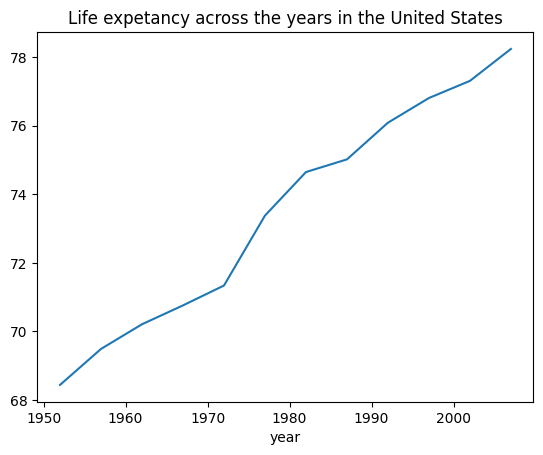

In [ ]:
# selecting the country and plot one single ilne
gapminder_US = gapminder[gapminder['country'] == 'United States']
gapminder_US[['year', 'lifeExp']].plot(kind = 'line',
                                       x = 'year',
                                       y = 'lifeExp',
                                       title = 'Life expetancy across the years in the United States',
                                       legend = False)#we don't want legend
plt.show()

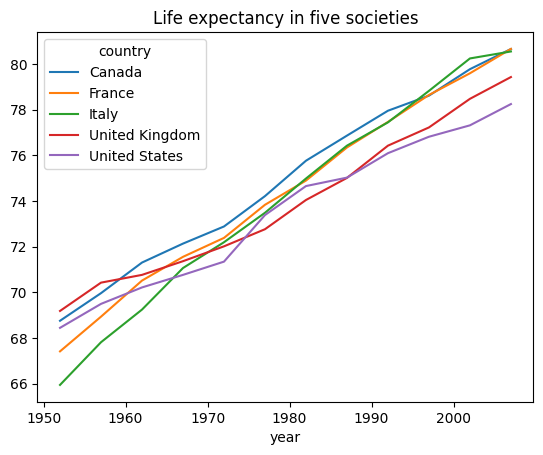

In [ ]:
# plot lines for "multiple groups"
gapminder_5countries = gapminder.loc[gapminder['country'].isin(['United States', 'Canada', 'United Kingdom', 'Italy', 'France'])]
gapminder_5countries_pivot = gapminder_5countries.pivot_table(values = 'lifeExp', columns = 'country', index = 'year')

gapminder_5countries_pivot.plot(title = 'Life expectancy in five societies')
plt.show()

### Showing the distribution: histogram

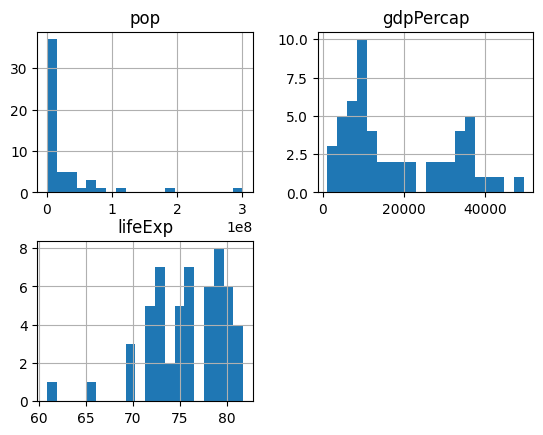

In [ ]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]
gapminder_2007[['pop', 'gdpPercap', 'lifeExp']].hist(bins = 20)#20 numbers/elements,pop:population
plt.show()

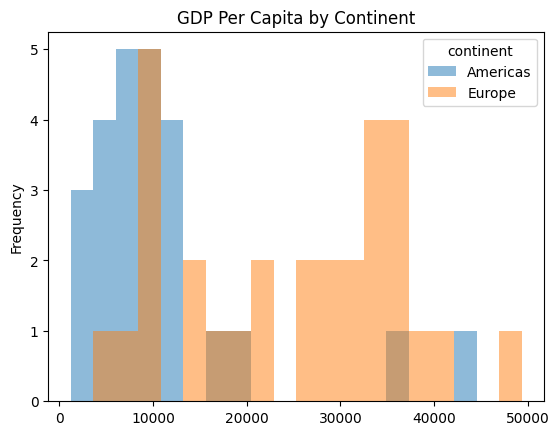

In [ ]:
# showing different groups
gapminder_continent_pivot = gapminder_2007.pivot_table(values = 'gdpPercap', columns = 'continent', index = 'country')
gapminder_continent_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'GDP Per Capita by Continent')#alpha:transparency
plt.show()#overlap


In [ ]:
continentFig=gapminder_continent_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'GDP Per Capita by Continent')
#create a datapath
continentFig.savefig(dataPath+'continent.')

### more on distribution: box plot
 - note: what is a [box plot](https://en.wikipedia.org/wiki/Box_plot)?

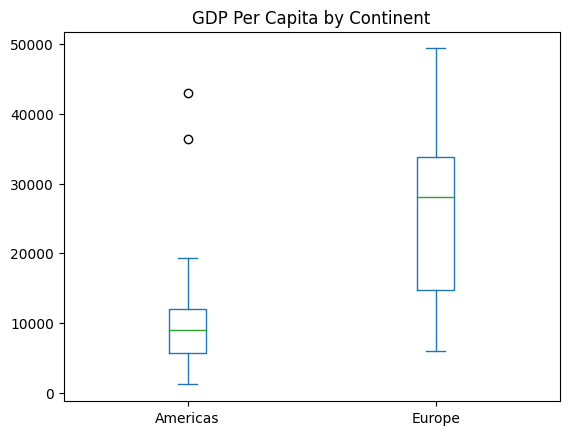

In [ ]:
gapminder_continent_pivot.plot(kind = 'box', title = 'GDP Per Capita by Continent')
plt.show()#we have two outliers in Americas

### Showing the correlation: scatter plot

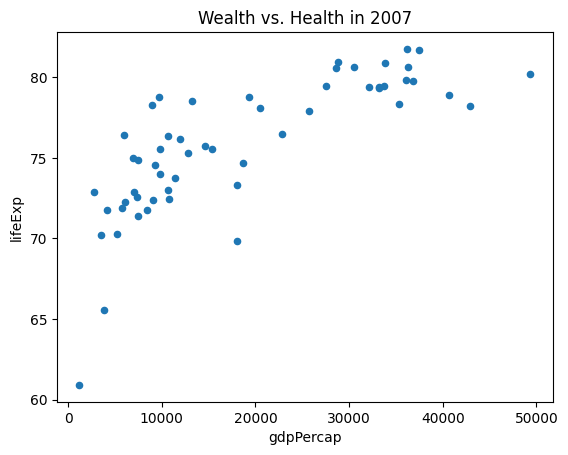

In [ ]:
gapminder_2007.plot(kind = 'scatter', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007')
plt.show()

### Showing the contrast: bar

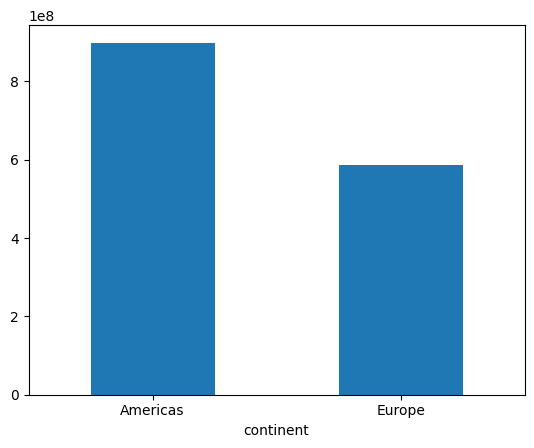

In [ ]:
# showing the grouped means for one variable
summarized_df = gapminder[gapminder['year'] == 2007].groupby(by = 'continent')['pop'].sum()#y:population
summarized_df.plot(kind = 'bar', rot = 0)#rot:rotation
plt.show()

# note: always use "color" with caution!

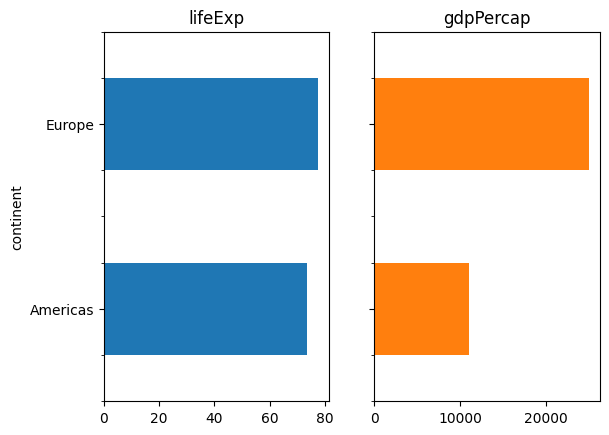

In [ ]:
# showing the grouped means for multiple variables
summarized_df = gapminder[gapminder['year'] == 2007].groupby(by = 'continent')[['lifeExp', 'gdpPercap']].mean()
summarized_df.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)#1 row 2 columns,share y value
plt.show()

## Multidimensional data visualization
 - a.k.a. problem-driven data visualization and data-driven exploration

### Q1: Globally, what is the relationship between life expectancy and GDP per capita?
    1. Hint: what about a scatter plot?
    2. Hint: try this: https://pythonspot.com/matplotlib-scatterplot/

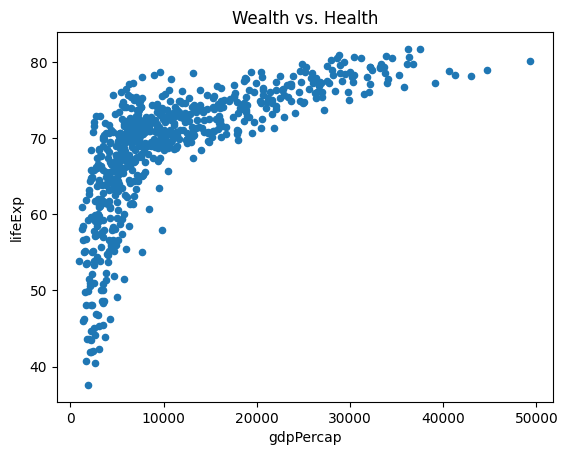

In [ ]:
gapminder.plot(kind = 'scatter', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health')#or show different column by year
plt.show()

### Will the relationship stipulated in Q1 differ across different continents?  

In [ ]:
continents = gapminder.groupby('continent').size()
print(continents.index)
numContinents = len(continents)
print('num of continents:',numContinents)

Index(['Americas', 'Europe'], dtype='object', name='continent')
num of continents: 2


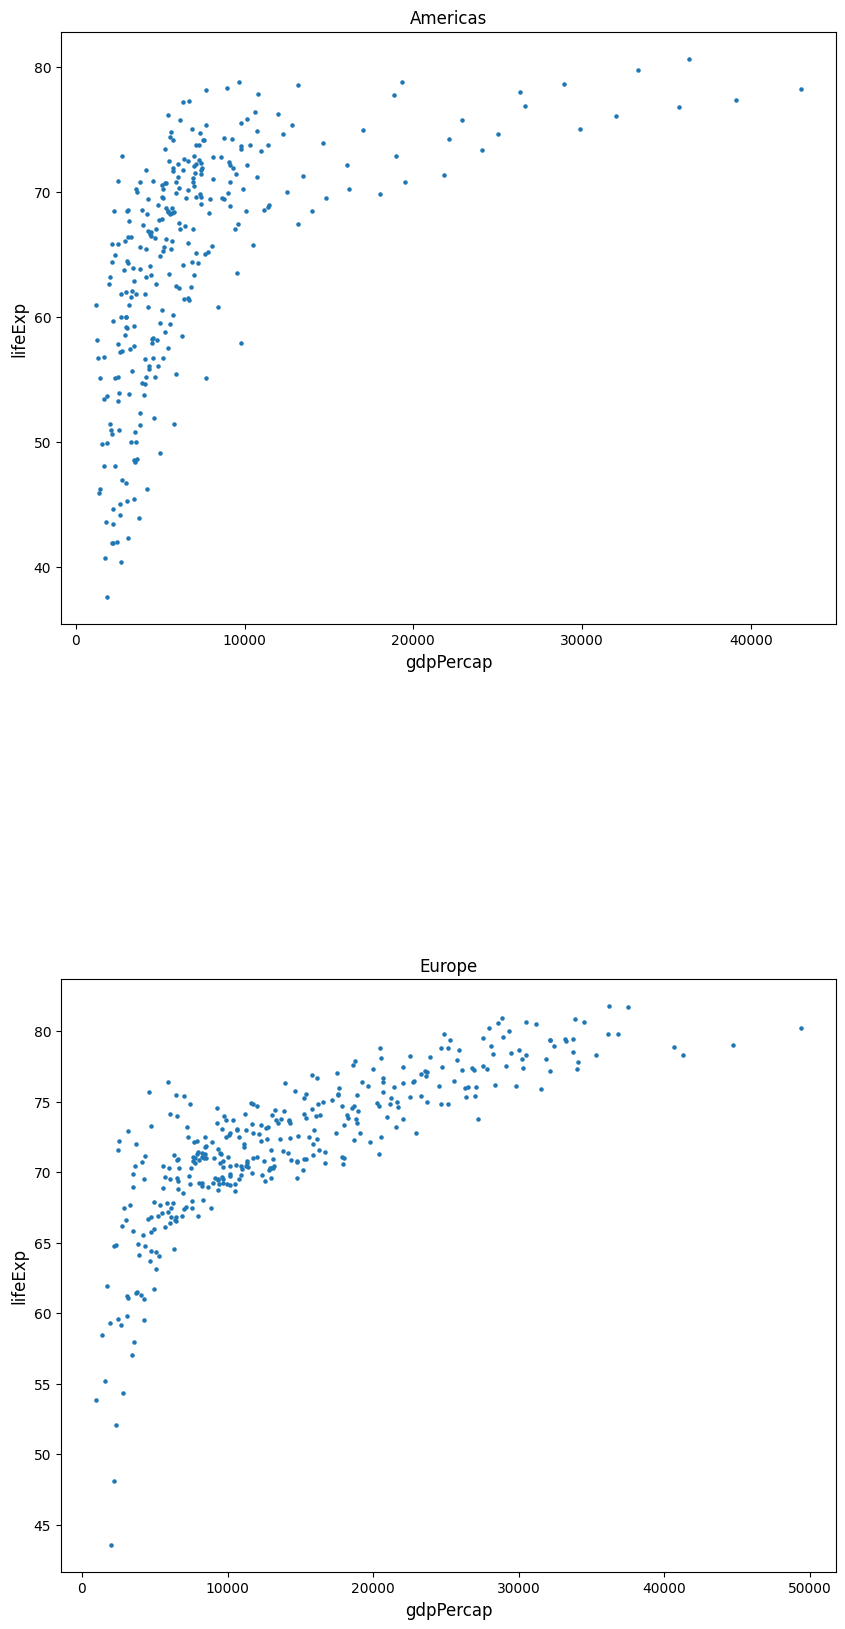

In [ ]:
fig = plt.figure(figsize=(10,20)) #create a new figure
fig.subplots_adjust(hspace=0.6)  # gaps between the figures ,design spacing between different subplot
n = 1
for con in continents.index:
    ax = fig.add_subplot(numContinents,1,n) #first continent,total n
    ax.set_title(con)
    x = gapminder[gapminder['continent'] == con]['gdpPercap']
    y = gapminder[gapminder['continent'] == con]['lifeExp']
    ax.scatter(x,y,s=5)
    ax.set_xlabel('gdpPercap',fontsize=12)
    ax.set_ylabel('lifeExp',fontsize=12)
    n = n+1
plt.show()

### Will the relationship stipulated in Q1 differ across different countries

In [ ]:
countries = gapminder.groupby('country').size()
print(countries.index)
numCountries = len(countries)
print('num of countries:',numCountries)

Index(['Albania', 'Argentina', 'Austria', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica', 'Mexico',
       'Montenegro', 'Netherlands', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Romania',
       'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Trinidad and Tobago', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Venezuela'],
      dtype='object', name='country')
num of countries: 55


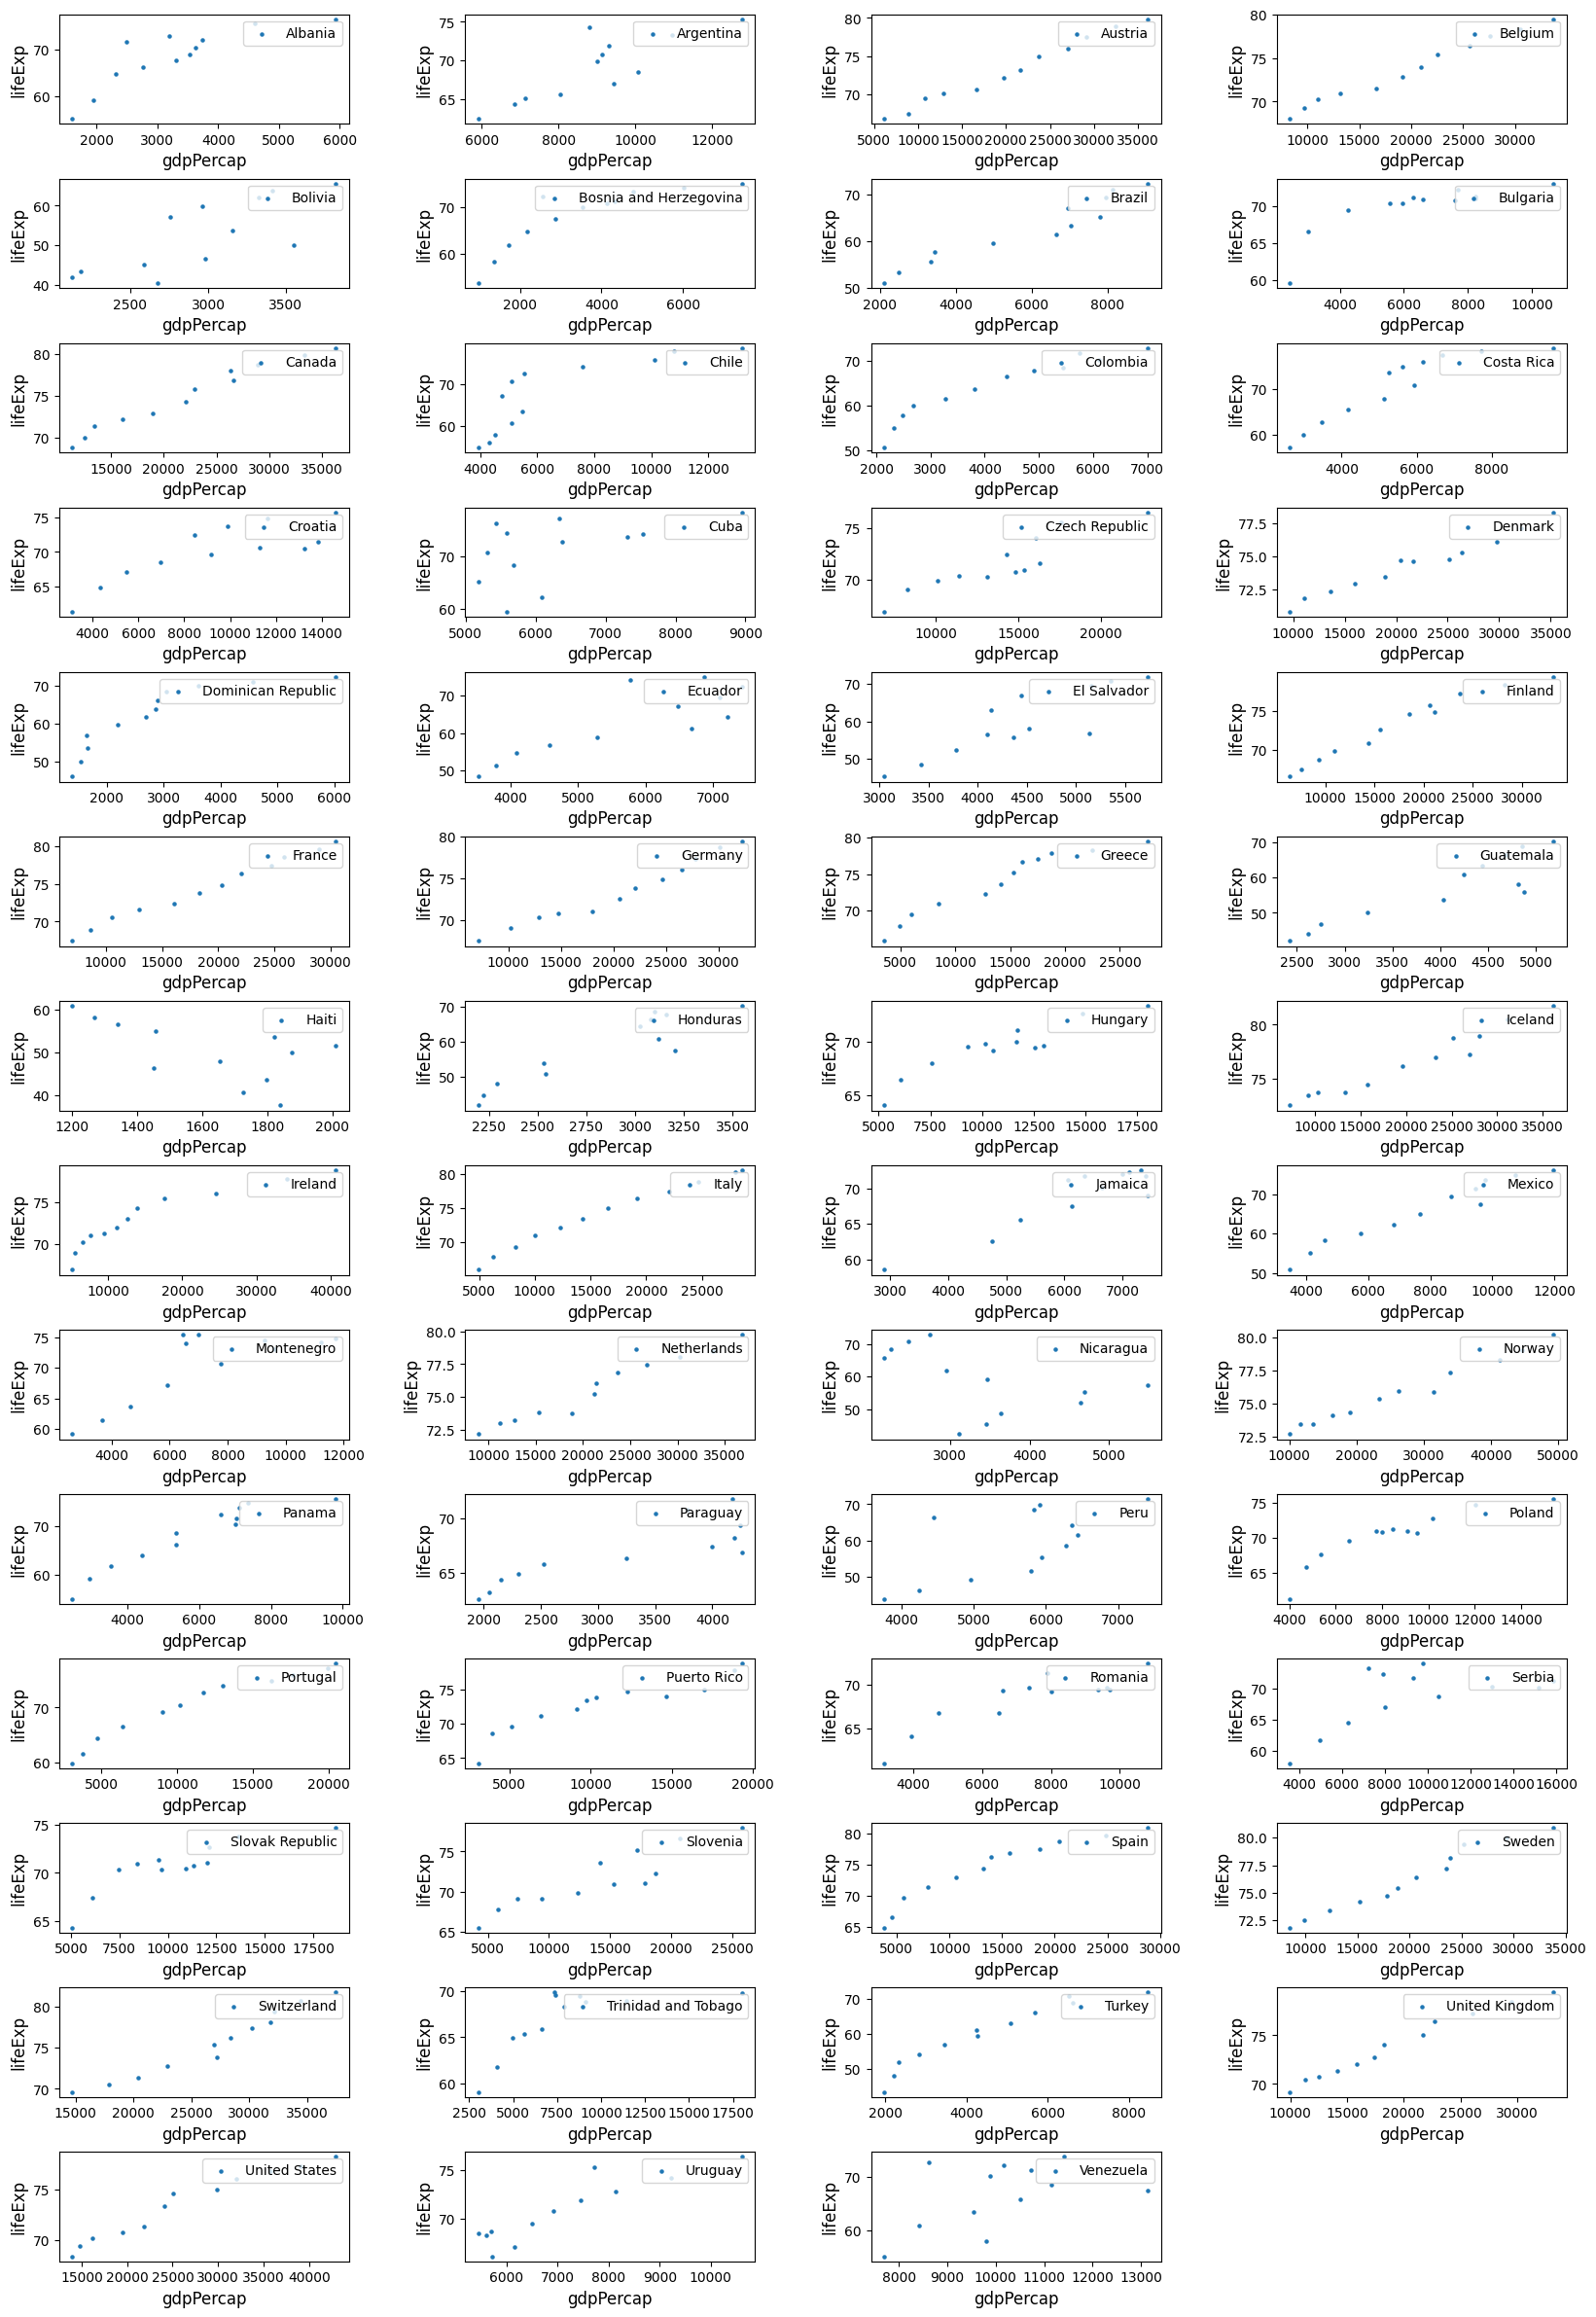

In [ ]:
fig = plt.figure(figsize=(20,120))
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1
for country in countries.index:
    ax = fig.add_subplot(numCountries,4,n)
    x = gapminder[gapminder['country'] == country]['gdpPercap']
    y = gapminder[gapminder['country'] == country]['lifeExp']
    ax.scatter(x,y,s=5)
    ax.set_xlabel('gdpPercap',fontsize=12)
    ax.set_ylabel('lifeExp',fontsize=12)
    ax.legend([country],loc = 'upper right') #title
    n = n+1

plt.show()#for each country in different year,if you want you can also use line plot

## Challenge: The Personal Computer Era

The introduction and mass production of Apple II computer in 1977 marks the start of the Personal Computer era. Let's see if this affected the countries well-being and which countries benefit the most.

The considerations are:
1. suppose the year of 1977 is treated as a boundary (a milestone cutting-off point), is there any difference in the well-being before and after that year?
2. If a general answer to 1. is “yes” (as the world is becoming healthier and richer), then which countries (or continents) benefit the most? (and which are the least?)
    

In [ ]:
gapminder.continent.value_counts()

Europe      360
Americas    300
Name: continent, dtype: int64

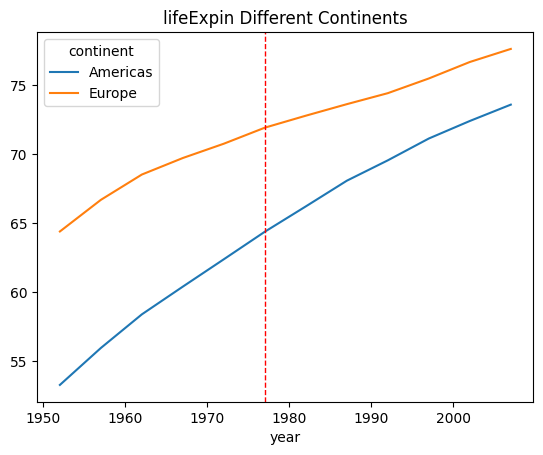

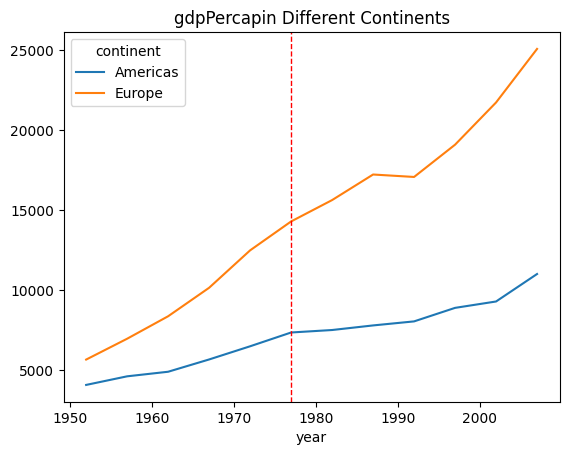

In [ ]:
#The growth trend of life expectancy and gdp per capita in Different Continents
for i in ('lifeExp','gdpPercap'):
    gapminder_all_pivot_l = gapminder.pivot_table(values = i, columns = 'continent', index = 'year')
    gapminder_all_pivot_l.plot(title = i + 'in Different Continents')
    plt.axvline(1977, color='r', linestyle='--', linewidth=1)#we add a vertical line in 1977

plt.show()#no change for lifespan
#generally no change

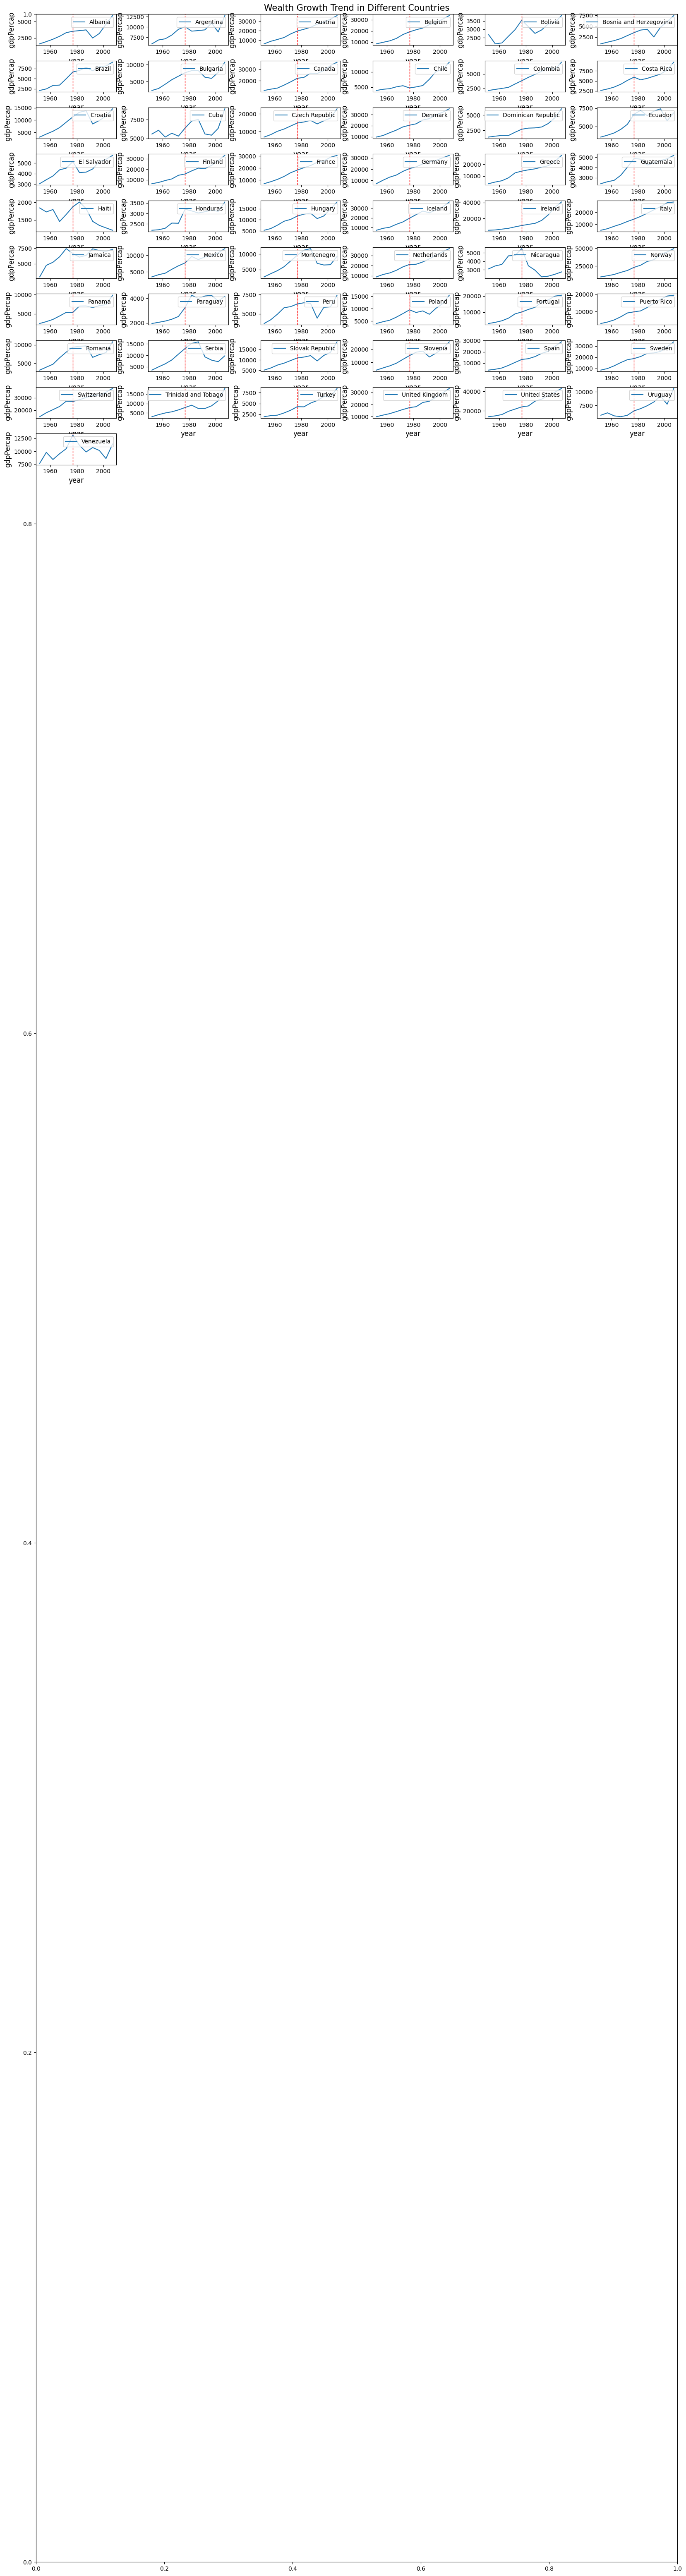

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
plt.title('Wealth Growth Trend in Different Countries',fontsize=15)
n = 1
for country in countries.index:
    ax = fig.add_subplot(numCountries,6,n)#6 columns
    x = gapminder[gapminder['country'] == country]
    gapminder_pivot_g = x.pivot_table(values = 'gdpPercap', columns = 'country', index = 'year')
    ax.plot(gapminder_pivot_g)
    ax.set_xlabel('year',fontsize=12)
    ax.set_ylabel('gdpPercap',fontsize=12)
    ax.legend([country],loc = 'upper right') #title
    plt.axvline(1977, color='r', linestyle='--', linewidth=1)
    #ax.grid(True, which='major',axis='x')
    n = n+1

plt.show()
#our personal computer era might no bring change

## Further readings:
1. The Art of Effective Visualization of Multi-dimensional Data. Link: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57 (Chinese translation: https://mp.weixin.qq.com/s/mD732PqDtqYdFZSxZWtvvg)
2. Seaborn gallery: https://seaborn.pydata.org/  and https://seaborn.pydata.org/examples/index.html
3. More topics: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

## **Acknowledgement**

The codes in this notebook is a modified version of Dr. Xinzhi Zhang notebook based on various sources.